# Project Title : Understanding Purchase Intent and Customer Satisfaction In Electronics Sales

#  Introduction
#### Understanding consumer behavior in the electronics market is vital for companies aiming to improve sales,
#### enhance customer experience, and fine-tune marketing strategies. This dataset offers a comprehensive view 
#### of consumer electronics sales, encompassing both product-related attributes and customer demographics.
#### Key features include product category, brand, pricing, customer age and gender, purchase frequency, 
#### satisfaction ratings, and a binary target variable—PurchaseIntent, indicating whether a customer intends to 
#### purchase the product.

#### By analyzing these variables, this project seeks to identify patterns and relationships that influence a 
#### consumer's likelihood to make a purchase. Machine learning models can leverage this data to predict
#### purchase intent, ultimately helping businesses target potential customers more effectively and personalize
#### their marketing efforts.


In [1]:
# importing all basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("consumer_electronics_sales_data.csv")

In [3]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [11]:
df.columns

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice',
       'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction', 'PurchaseIntent'],
      dtype='object')

In [13]:
df.shape

(9000, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [17]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


## Data Cleaning

In [7]:
# checking for null values
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [9]:
# checking for dulicates and droping
df[df.duplicated(keep=False)]
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [87]:
# checking for unique values
df.nunique()

ProductID               9000
ProductCategory            5
ProductBrand               5
ProductPrice            9000
CustomerAge               52
CustomerGender             2
PurchaseFrequency         19
CustomerSatisfaction       5
PurchaseIntent             2
dtype: int64

In [11]:
# define value counts
def valuecounts(df):
    for col in df.columns:
        print(df[col].value_counts())

In [91]:
df_sem=df[["ProductCategory","ProductBrand","ProductPrice"]]
valuecounts(df_sem)

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64
ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64
ProductPrice
312.949668     1
578.916196     1
699.560319     1
2468.218410    1
1934.225349    1
              ..
2876.656745    1
2213.412535    1
812.674582     1
471.585295     1
2315.583087    1
Name: count, Length: 9000, dtype: int64


# Exploratory Data Analysis


## Dependent Variables

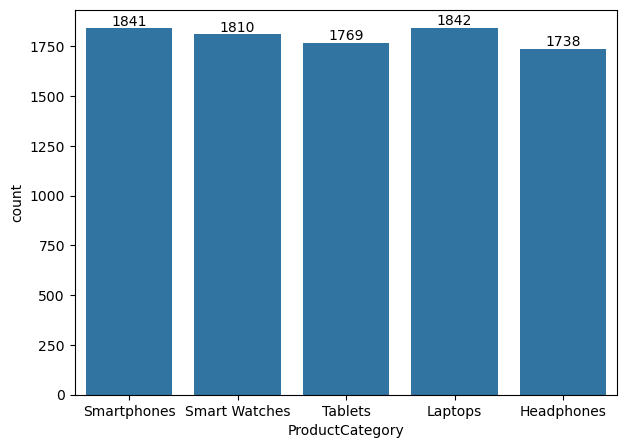

In [95]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=df,x="ProductCategory")
ax.bar_label(ax.containers[0])
plt.show()

In [49]:
#from the above graph, it is clear that each product category is around the range of 1700.

In [97]:
gpb=df.groupby("ProductBrand").agg({"ProductPrice":'mean'})
print(gpb)

              ProductPrice
ProductBrand              
Apple          1502.500348
HP             1539.973206
Other Brands   1499.356942
Samsung        1568.324868
Sony           1524.680821


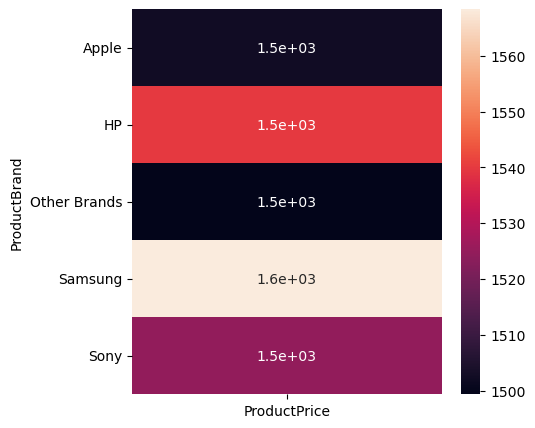

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(gpb,annot=True)
plt.show()

In [99]:
gpb=df.groupby("ProductBrand").agg({"CustomerSatisfaction":'mean'})
print(gpb)

              CustomerSatisfaction
ProductBrand                      
Apple                     3.057955
HP                        2.981319
Other Brands              3.014640
Samsung                   2.962783
Sony                      2.965922


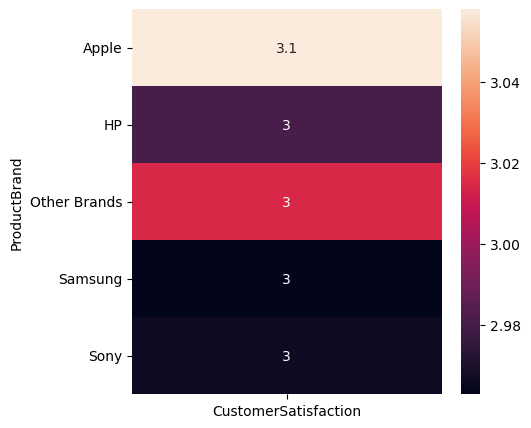

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(gpb,annot=True)
plt.show()

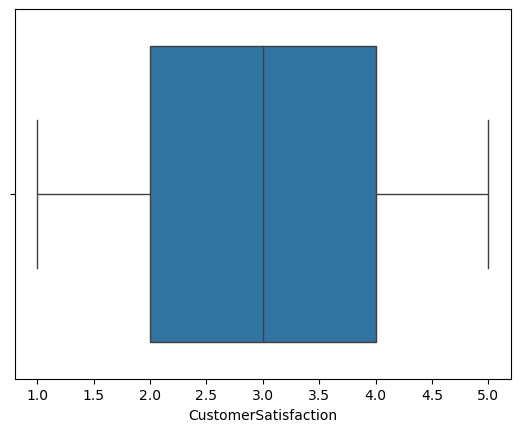

In [101]:
sns.boxplot(data=df,x="CustomerSatisfaction")
plt.show()

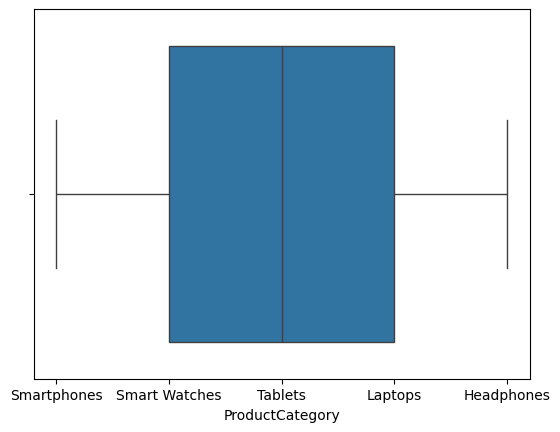

In [29]:
sns.boxplot(data=df,x="ProductCategory")
plt.show()

In [103]:
print(df["ProductBrand"].unique())

['Other Brands' 'Samsung' 'Sony' 'HP' 'Apple']


## Distribution of ProductBrands

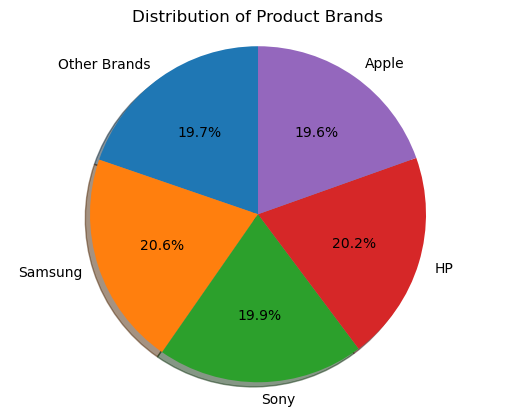

In [13]:
groupA=df.loc[(df["ProductBrand"]=='Other Brands')].count()
groupB=df.loc[(df["ProductBrand"]=='Samsung')].count()
groupC=df.loc[(df["ProductBrand"]=='Sony')].count()
groupD=df.loc[(df["ProductBrand"]=='HP')].count()
groupE=df.loc[(df["ProductBrand"]=='Apple')].count()

l=['Other Brands','Samsung','Sony','HP','Apple']
mlist=[groupA["ProductBrand"],groupB["ProductBrand"],groupC["ProductBrand"],groupD["ProductBrand"],groupE["ProductBrand"]]
plt.pie(mlist, labels=l, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Product Brands')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


##### Interpretation:
The chart illustrates the distribution of products across specific brands.
Other Brands dominate the product range, accounting for the largest share, indicating a high presence of diverse or lesser-known brands in the market.
Samsung and Apple also hold significant portions, reflecting their strong market positions.
Meanwhile, Sony and HP represent smaller shares, suggesting comparatively lower product availability or popularity within the dataset.



# Correlation 

In [107]:
# Convert categories to numeric codes
df['ProductCategory'] = df['ProductCategory'].astype('category').cat.codes
df['ProductBrand'] = df['ProductBrand'].astype('category').cat.codes


In [109]:
df.corr()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
ProductID,1.000000,-0.000541,0.010111,0.022327,-0.005579,0.017049,0.012688,-0.001504,-0.006596
ProductCategory,-0.000541,1.000000,0.002044,-0.019288,0.012900,0.006489,-0.024154,-0.002354,0.010940
ProductBrand,0.010111,0.002044,1.000000,0.012437,-0.004649,-0.029625,0.017497,-0.020234,-0.022632
ProductPrice,0.022327,-0.019288,0.012437,1.000000,-0.009322,0.001835,0.009281,0.002112,-0.017512
CustomerAge,-0.005579,0.012900,-0.004649,-0.009322,1.000000,-0.010767,0.005746,0.003753,0.289798
CustomerGender,0.017049,0.006489,-0.029625,0.001835,-0.010767,1.000000,-0.008643,0.007959,0.504412
PurchaseFrequency,0.012688,-0.024154,0.017497,0.009281,0.005746,-0.008643,1.000000,0.020603,-0.001465
CustomerSatisfaction,-0.001504,-0.002354,-0.020234,0.002112,0.003753,0.007959,0.020603,1.000000,0.391133
PurchaseIntent,-0.006596,0.010940,-0.022632,-0.017512,0.289798,0.504412,-0.001465,0.391133,1.000000


In [111]:
corr_matrix = df.corr()


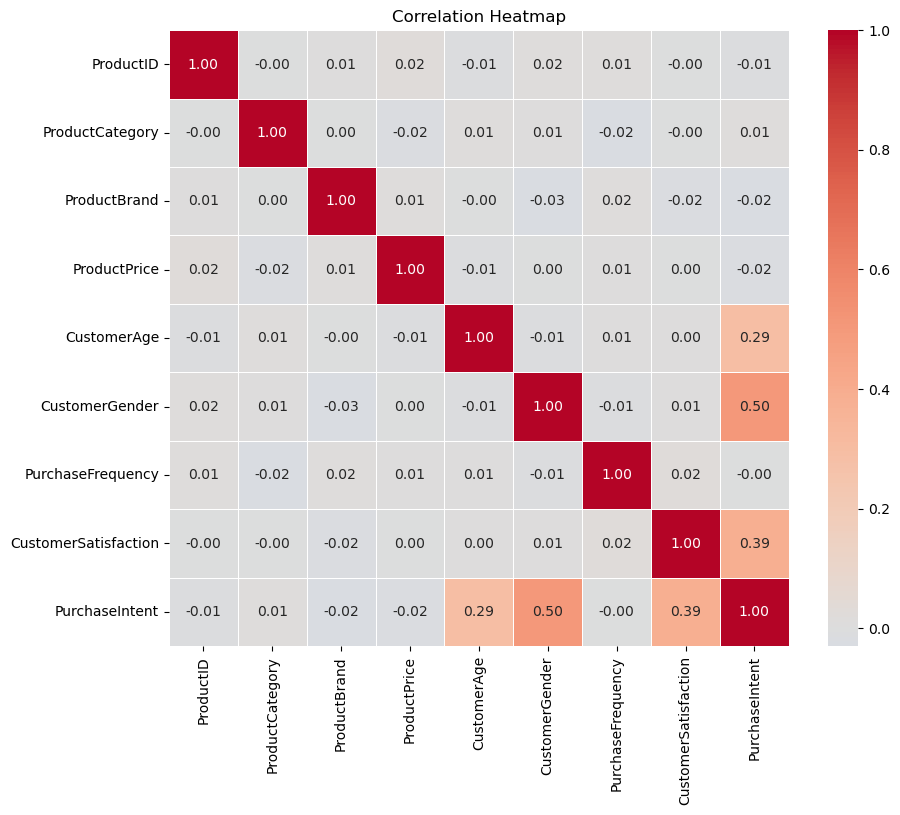

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Machine Learning Model

In [44]:
# Model Building-RandomForestClassifier 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error


In [7]:
# Load data 
df = pd.read_csv("consumer_electronics_sales_data.csv")

#### Loads the dataset into a pandas DataFrame.
####  The dataset contains product and customer information, including the target label PurchaseIntent.


In [12]:
X = df.drop(columns=["PurchaseIntent", "ProductID"]) 
y = df["PurchaseIntent"]

#### X contains the independent variables (features).

#### y is the dependent variable or label we want to predict (0 = no purchase intent, 1 = intent).

#### ProductID is excluded since it's just an identifier and has no predictive power.



In [15]:
categorical_cols = ["ProductCategory", "ProductBrand"]

#### Identifies categorical variables that need to be encoded (converted to numbers) for machine learning algorithms to work properly.



In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"  
)


#### OneHotEncoder is used to convert categorical variables into binary vectors.
#### ColumnTransformer allows you to apply transformations only to specific columns,
#### leaving the rest (remainder="passthrough") untouched (e.g., numerical features like age or price).



In [23]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])


#### A pipeline chains the preprocessing and modeling steps into a single workflow.
#### The Random Forest Classifier is chosen due to its robustness, good performance,
#### and handling of both numerical and categorical data.
#### n_estimators=100 means it builds 100 decision trees.



In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


####  Train/Test Split
#### Splits the dataset into 80% for training and 20% for testing.
#### Ensures the model is evaluated on unseen data to simulate real-world performance.




In [30]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ProductCategory',
                                                   'ProductBrand'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Train the model
#### Fits (trains) the pipeline on the training data.
#### Internally applies preprocessing and then trains the Random Forest model.

In [39]:
y_pred = pipeline.predict(X_test)

#### Uses the trained pipeline to predict PurchaseIntent on test data.

In [48]:
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nAccuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")



Accuracy: 0.9528
RMSE: 0.2173


#### Accuracy and RMSE
#### Accuracy: Percentage of correct predictions over total predictions.
#### RMSE (Root Mean Squared Error): Measures the average magnitude of prediction error.
#### RMSE is more commonly used in regression, but here it gives an additional sense of prediction spread for classification as 0/1.

In [70]:
# Step 9: Add Predictions to Test Data
# -------------------------------------
# First, reset the index so we can merge properly
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name='Predicted_Charges')

# Combine actual features, actual charges, and predicted charges
final_df = pd.concat([X_test_reset, y_test_reset, y_pred_series], axis=1)

# Show top 10 rows of the updated dataset
print(df.head(10))
print(final_df.head(10))

   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   
5       5879     Smartphones       Samsung    373.148325           37   
6       5880     Smartphones       Samsung   2330.036775           26   
7       5881     Smartphones            HP    780.101494           35   
8       5882         Laptops  Other Brands   2264.561583           19   
9       5883         Laptops            HP   1001.624006           66   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7      

# Conclusion
#### The analysis and modeling performed on this consumer electronics sales dataset successfully revealed 
#### particularly a Random Forest classifier—we achieved high prediction accuracy, demonstrating the model’s 
#### effectiveness in identifying key drivers of purchase intent.

#### Features like product price, customer satisfaction, and purchase frequency emerged as strong indicators 
#### of buying behavior. These insights not only aid in predictive modeling but also empower businesses to tailor
#### their offerings and improve customer engagement strategies. Overall, this dataset provides a valuable
#### foundation for data-driven decision-making in the consumer electronics market.

